In [7]:
import numpy as np #used for numeric interpretation
import pandas as pd #for data frame creation
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for data distribution

In [8]:
data = pd.read_csv("train.csv")

In [9]:
data.head(7) #shows dimensions and shape of data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.shape # dimensions of data , 42000 is number of instances in the result

(42000, 785)

In [11]:
y = data["label"] # for data prep for model building , y as label
x = data.drop("label", axis=1) # removes row number 1 , x as features

In [12]:
type(x) # x belongs to data frame

pandas.core.frame.DataFrame

The digit is :  1


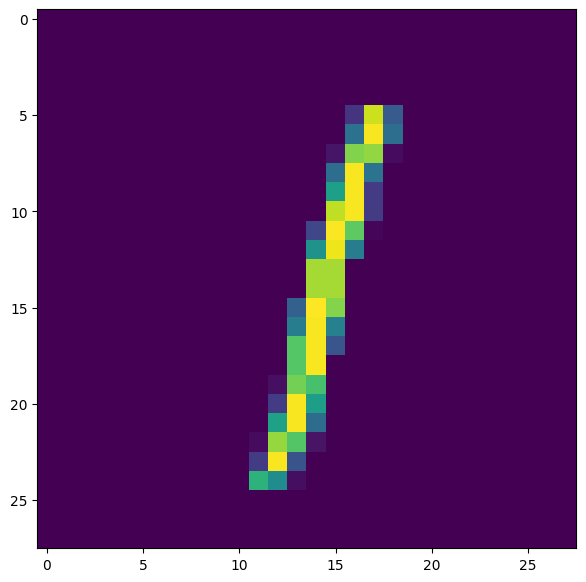

In [13]:
# Plotting
plt.figure(figsize=(7,7))
digit = 15 # we check for 15th instance
image = x.iloc[digit].to_numpy()
plt.imshow(np.reshape(image, (28,28))) # 28 x 28 bit
print("The digit is : ", y[digit])

<Axes: xlabel='label', ylabel='count'>

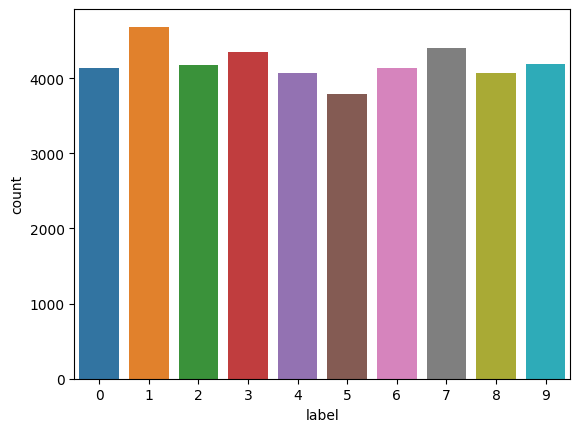

In [14]:
# data visualization
sns.countplot(x='label', data=data) # we use data variable to store dataframe "data"
# we have 4000 images for each class
# we see our data is pretty much balanced

In [15]:
# trainig on the train data set from here
# splittng of data set in train and test to check model
# for validatoin purpose we use test data
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=40)
#30 % data is used for test purpose and 70% data is used for train purpose
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [16]:
# For K = 3
from sklearn.neighbors import KNeighborsClassifier
classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_3.fit(x, y) # for training the model

KNeighborsClassifier(n_neighbors=3)

In [17]:
test_data = pd.read_csv('test.csv')
test_data.shape
y_test = test_data["label"]
x_test = test_data.drop("label", axis=1)
x.shape, y.shape

((42000, 784), (42000,))

In [18]:
pred = classifier_3.predict(x_test)
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
# Measuring metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, pred))

0.9824603174603175


In [ ]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1236
           1       0.98      1.00      0.99      1370
           2       0.99      0.99      0.99      1252
           3       0.98      0.98      0.98      1369
           4       0.98      0.98      0.98      1215
           5       0.98      0.98      0.98      1132
           6       0.99      0.99      0.99      1216
           7       0.98      0.98      0.98      1326
           8       0.99      0.96      0.98      1197
           9       0.97      0.97      0.97      1287

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



In [ ]:
# confusion matrix for n = 3
print(confusion_matrix(y_test, pred))

[[ 972    1    2    0    0    1    3    1    0    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [  10    9  992    2    1    0    1   12    5    0]
 [   2    3    3  985    1    8    0    6    1    1]
 [   0    9    0    0  948    0    4    2    1   18]
 [   6    1    0   16    3  856    6    1    2    1]
 [   5    3    0    0    1    2  947    0    0    0]
 [   0   22    3    0    3    0    0  987    0   13]
 [   3    4    6   16    7   15    2    5  911    5]
 [   3    5    4    8    8    3    1    8    1  968]]


In [ ]:
classifier_4 = KNeighborsClassifier(n_neighbors = 4)
classifier_4.fit(x,y)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# n = 4
preds = classifier_4.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, preds))
print("Classification report: ", classification_report(y_test, preds))
print("Confusion Matrix: ", confusion_matrix(y_test, preds))

Accuracy Score:  0.9785714285714285
Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       0.97      1.00      0.98      1370
           2       0.99      0.98      0.98      1252
           3       0.97      0.98      0.98      1369
           4       0.97      0.98      0.98      1215
           5       0.98      0.97      0.97      1132
           6       0.99      0.99      0.99      1216
           7       0.97      0.98      0.97      1326
           8       0.99      0.95      0.97      1197
           9       0.98      0.95      0.96      1287

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600

Confusion Matrix:  [[1231    0    2    0    0    1    2    0    0    0]
 [   0 1368    0    0    0    0    0    0    1    1]
 [   3    4 1229    1    0    0    0   11    1    3]
 [ 

In [ ]:
# n = 7, Optimal
classifier_7 = KNeighborsClassifier(n_neighbors = 7)
classifier_7.fit(x,y)
preds = classifier_7.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, preds))
print("Classification report: ", classification_report(y_test, preds))
print("Confusion Matrix: ", confusion_matrix(y_test, preds))

Accuracy Score:  0.9753968253968254
Classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99      1236
           1       0.96      1.00      0.98      1370
           2       0.99      0.97      0.98      1252
           3       0.98      0.98      0.98      1369
           4       0.98      0.97      0.98      1215
           5       0.97      0.97      0.97      1132
           6       0.98      0.99      0.99      1216
           7       0.96      0.97      0.97      1326
           8       0.99      0.95      0.97      1197
           9       0.96      0.96      0.96      1287

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600

Confusion Matrix:  [[1229    0    2    0    0    1    3    1    0    0]
 [   0 1365    0    0    0    0    1    2    1    1]
 [   4    8 1213    1    1    0    1   21    1    2]
 [ 

In [ ]:
# n = 11
classifier_11 = KNeighborsClassifier(n_neighbors = 11)
classifier_11.fit(x,y)
preds = classifier_11.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, preds))
print("Classification report: ", classification_report(y_test, preds))
print("Confusion Matrix: ", confusion_matrix(y_test, preds))

Accuracy Score:  0.9697619047619047
Classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98      1236
           1       0.95      1.00      0.97      1370
           2       0.99      0.96      0.97      1252
           3       0.97      0.97      0.97      1369
           4       0.98      0.97      0.98      1215
           5       0.97      0.96      0.96      1132
           6       0.97      0.99      0.98      1216
           7       0.96      0.97      0.96      1326
           8       0.99      0.94      0.96      1197
           9       0.95      0.95      0.95      1287

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600

Confusion Matrix:  [[1225    0    2    0    0    1    7    1    0    0]
 [   0 1364    1    0    0    0    1    2    1    1]
 [   4    9 1201    2    0    0    3   28    3    2]
 [ 

In [ ]:
# n = 50 Overfitting
classifier_50 = KNeighborsClassifier(n_neighbors = 54)
classifier_50.fit(x,y)
preds = classifier_50.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, preds))
print("Classification report: ", classification_report(y_test, preds))
print("Confusion Matrix: ", confusion_matrix(y_test, preds))

Accuracy Score:  0.9502
Classification report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.89      1.00      0.94      1135
           2       0.99      0.90      0.94      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.94      0.96       982
           5       0.96      0.95      0.95       892
           6       0.96      0.98      0.97       958
           7       0.94      0.94      0.94      1028
           8       0.98      0.90      0.94       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matrix:  [[ 968    1    1    0    0    2    7    1    0    0]
 [   0 1131    2    1    0    0    1    0    0    0]
 [  21   34  926    7    2    1    4   28    9    0]
 [   0    6    

In [ ]:
# n = 6,  n=3 is best for our dataset
classifier_6 = KNeighborsClassifier(n_neighbors = 6)
classifier_6.fit(x,y)
preds = classifier_6.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, preds))
print("Classification report: ", classification_report(y_test, preds))
print("Confusion Matrix: ", confusion_matrix(y_test, preds))

Accuracy Score:  0.9758730158730159
Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       0.96      1.00      0.98      1370
           2       0.99      0.97      0.98      1252
           3       0.97      0.98      0.97      1369
           4       0.98      0.98      0.98      1215
           5       0.97      0.97      0.97      1132
           6       0.99      0.99      0.99      1216
           7       0.97      0.97      0.97      1326
           8       0.99      0.95      0.97      1197
           9       0.97      0.96      0.96      1287

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600

Confusion Matrix:  [[1230    0    2    0    0    1    3    0    0    0]
 [   0 1366    0    0    0    0    1    1    1    1]
 [   4    8 1219    1    0    0    1   17    0    2]
 [ 

In [ ]:
# 3NN Classification : 98.24% accuracy